In [2]:
# import pandas library and read csv-file into dataframe
import folium
import pandas as pd

from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from geopy import distance
from matplotlib import colormaps, colors

df = pd.read_csv('data/eda.csv')

In [3]:
# check dataset columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [4]:
# check for duplicates
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [5]:
# convert 'date' to pandas timestamp type and check result
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(type(df['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
# check unique values in columns with nan-values to assume value to insert for nan-values
print(df['waterfront'].unique())
print(df['view'].unique())
print(df['sqft_basement'].unique())
print(df['yr_renovated'].unique())

[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[   0.  400.  910. 1530.   nan  730. 1700.  300.  970.  760.  720.  700.
  820.  780.  790.  330. 1620.  360.  588. 1510.  410.  990.  600.  560.
  550. 1000. 1600.  500. 1040.  880. 1010.  240.  265.  290.  800.  540.
  710.  840.  380.  770.  480.  570. 1490.  620. 1250. 1270.  120.  650.
  180. 1130.  450. 1640. 1460. 1020. 1030.  750.  640. 1070.  490. 1310.
  630. 2000.  390.  430.  850.  210. 1430. 1950.  440.  220. 1160.  860.
  580. 2060. 1820. 1180.  200. 1150. 1200.  680.  530. 1450. 1170. 1080.
  960.  280.  870. 1100.  460. 1400.  660. 1220.  900.  420. 1580. 1380.
  475.  690.  270.  350.  935. 1370.  980. 1470.  160.  950.   50.  740.
 1780. 1900.  340.  470.  370.  140. 1760.  130.  520.  890. 1110.  150.
 1720.  810.  190. 1290.  670. 1800. 1120. 1810.   60. 1050.  940.  310.
  930. 1390.  610. 1830. 1300.  510. 1330. 1590.  920. 1320. 1420. 1240.
 1960. 1560. 2020. 1190. 2110. 1280.  250. 2390. 1230.  170.  830. 1260.
 1410. 1340

In [7]:
# check if any values in 'yr_renovated' is not divisible by 10
modulo_renovated = df['yr_renovated'] % 10
print(any(modulo_renovated > 0))

False


## ____

We decided to fill all nan-values with 0s to not lose too much information about the houses (e.g. column 'waterfront' has over 2000 nan-values which would be too many rows to drop). 

Of course, this kind of imputing can also be disadvantageous. A view quality of 0 instead of 'nan' is a huge difference. Maybe the house has a high view quality and could sell for a higher price because of that view.

However, as we are not including 'waterfront', 'view', or 'sqft_basement' into testing our hypotheses, we continue with filling 'nan' with 0s to have a dataset as complete as possible. 

Additionally, as there are many 'nan'-values in 'yr_renovated' and the majority of houses without 'nan'-values has not been renovated, it can be assumed that those with 'nan'-values were also not renovated.

The column 'yr_renovated' appears to be flawed as all values that are not 0 or 'nan' have 5 digits. It seems like the years were multiplied with 10 for some reason. Since there are no values that are not divisible by 10 (see above) it is presumably safe to just divide all values by 10.

## ____

In [8]:
# fill nan-values with 0s
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].fillna(0)
# additionally divide 'yr_renovated' by 10 as it is denoted incorrectly in original dataset
df['yr_renovated'] = df['yr_renovated'].fillna(0) / 10

In [9]:
# convert columns to more reasonable types and check result
df = df.astype({'bedrooms': int,
                'bathrooms': int,
                'floors': int,
                'waterfront': int,
                'view': int,
                'yr_renovated': int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  int64         
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  int64         
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21597 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [10]:
# create new column for year
df['year'] = df.date.dt.year

# create new column for year-month
df['year_month'] = df['date'].dt.strftime('%Y-%m')

# create a new column for month -> seasons
df['month'] = df.date.dt.month

# create seasons by using a dictionary and .map()
seasons_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
}

df['season'] = df['date'].dt.month.map(seasons_map)

city_center = [47.6050242, -122.3343709]
df['dist_center'] = [distance.geodesic((row['lat'], row['long']), (city_center[0], city_center[1])).km for _, row in df.iterrows()]

df.head(15)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,year,year_month,month,season,dist_center
0,7129300520,3,1,1180.0,5650.0,1,0,0,3,7,...,-122.257,1340.0,5650.0,2014-10-13,221900.0,2014,2014-10,10,Fall,11.946707
1,6414100192,3,2,2570.0,7242.0,2,0,0,3,7,...,-122.319,1690.0,7639.0,2014-12-09,538000.0,2014,2014-12,12,Winter,12.946207
2,5631500400,2,1,770.0,10000.0,1,0,0,3,6,...,-122.233,2720.0,8062.0,2015-02-25,180000.0,2015,2015-02,2,Winter,16.619705
3,2487200875,4,3,1960.0,5000.0,1,0,0,5,7,...,-122.393,1360.0,5000.0,2014-12-09,604000.0,2014,2014-12,12,Winter,10.351539
4,1954400510,3,2,1680.0,8080.0,1,0,0,3,8,...,-122.045,1800.0,7503.0,2015-02-18,510000.0,2015,2015-02,2,Winter,21.795625
5,7237550310,4,4,5420.0,101930.0,1,0,0,3,11,...,-122.005,4760.0,101930.0,2014-05-12,1230000.0,2014,2014-05,5,Spring,25.397384
6,1321400060,3,2,1715.0,6819.0,2,0,0,3,7,...,-122.327,2238.0,6819.0,2014-06-27,257500.0,2014,2014-06,6,Summer,32.838777
7,2008000270,3,1,1060.0,9711.0,1,0,0,3,7,...,-122.315,1650.0,9711.0,2015-01-15,291850.0,2015,2015-01,1,Winter,21.787447
8,2414600126,3,1,1780.0,7470.0,1,0,0,3,7,...,-122.337,1780.0,8113.0,2015-04-15,229500.0,2015,2015-04,4,Spring,10.311136
9,3793500160,3,2,1890.0,6560.0,2,0,0,3,7,...,-122.031,2390.0,7570.0,2015-03-12,323000.0,2015,2015-03,3,Spring,34.854163


In [20]:
df['condition'].unique()
# df['grade'].unique()

array([3, 5, 4, 1, 2])

In [12]:
# #change data type to float
# df = df.astype({'lat': float})
# df = df.astype({'long': float})
# df = df.astype({'price': float})

# print(sorted(colormaps))

norm = colors.Normalize(vmin=df["price"].quantile(q=0.25), vmax=df["price"].quantile(q=0.75))
# norm = colors.Normalize(vmin=df["price"].min(), vmax=df["price"].max())
cmap = colormaps["coolwarm"]

#center map on Seattle
# 47.6062, -122.3321
m = folium.Map(location=city_center, zoomstart=12)

#add points for each house
for _, row in df.iterrows():
    color = colors.to_hex(cmap(norm(row['price'])))
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=2,
        popup=f"Price: $ {row['price']:,}\nDistance Center: {round(row['dist_center'], 2)}",
        color=color,
        fill=True,
        fill_opacity=0.3
    ).add_to(m)

folium.CircleMarker(
    location=city_center,
    radius=15,
    popup="City Center",
    color="black",
    fill=True,
    fill_opacity=0.6
).add_to(m)

# m

In [13]:
# #cluster markers
# marker_cluster = MarkerCluster().add_to(m)

# #heatmap of prices
# HeatMap(df[['lat', 'long', 'price']]).add_to(m)

# m

In [19]:
from scipy.stats import pearsonr

# old_houses = df[df['yr_built'] < 1990]
# new_houses = df[df['yr_built'] >= 1990]

coeff, p = pearsonr(df['grade'], df['price'])

print(round(coeff, 3))

0.668


In [ ]:
# old_houses = df[df['yr_built'] < 1990]
# new_houses = df[df['yr_built'] >= 1990]

poor_houses = df[df['condition'] < 6]
poor_houses.shape

# m = folium.Map(location=city_center, zoomstart=12)

# for _, row in poor_houses.iterrows():
#     folium.CircleMarker(
#         location=[row['lat'], row['long']],
#         radius=2,
#         popup=f"Price: $ {row['price']:,}\nDistance Center: {round(row['dist_center'], 2)}",
#         color='blue',
#         fill=True,
#         fill_opacity=0.3
#     ).add_to(m)

# m

(270, 26)

(array([   29.,     0.,   170.,     0.,     0., 14020.,     0.,  5677.,
            0.,  1701.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

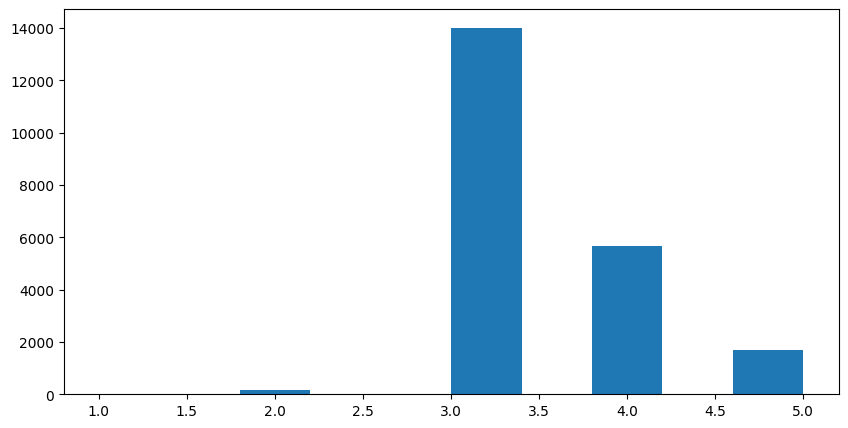

In [21]:
import matplotlib.pyplot as plt

# low_price = df[df['price'] < 3000000]
# x = low_price['dist_center']
# y = low_price['price']

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df['condition'])